# Train character embeddings using word2vec skipgram approach 

We look at ith character and try to predict (i-1) and (i+1) character

In [1]:
#for inline plotting in notebooks
%matplotlib inline  

In [3]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get data

In [5]:
# load data
path = "./../data/harry_potter_3.txt"
text = open(path).read()

corpus_length = len(text)

print('corpus length:', corpus_length)

corpus length: 611606


In [8]:
unique_chars = list(set(text))
print('total no of unique chars:', len(unique_chars))

print ("\nSet of characters : \n" + str(unique_chars))

total no of unique chars: 79

Set of characters : 
['?', "'", '\\', '-', 'Z', 'w', '!', 'f', 'A', '7', 'M', 'Y', 'x', '\n', 'H', '5', '6', 'F', 'I', 'K', '3', 'T', 'z', 'y', ',', 'g', '"', 'B', 'b', 'l', ' ', ':', 'X', 'a', 'R', '&', '*', 't', '(', 'Q', '4', 'h', 's', 'E', 'N', 'j', 'r', '_', 'k', 'u', 'v', 'c', 'W', ')', 'L', '2', 'V', 'i', 'S', 'J', 'p', 'q', '`', 'G', '0', 'n', 'd', '.', 'U', 'e', '9', ';', 'P', 'o', 'C', 'O', '1', 'D', 'm']


In [9]:
def classToOneHot(item, classes):

	x = [0. for _ in classes]
	
	x[classes.index(item)] = 1.

	return x

In [10]:
classToOneHot('a', unique_chars)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [11]:
def findClosest(labels, coords, n=3):
	def dist(p1, p2):
		return np.linalg.norm(np.array(p1)-np.array(p2))
	for label, pos in zip(labels, coords):
		print(label)
		dists = []
		for l2, p2 in zip(labels, coords):
			if l2==label: continue
			dists.append((l2, dist(pos, p2)))
		dists = sorted(dists, key=lambda x : x[1])
		if n == -1:
			if dists[0][1] >= 0.2:
				print("\t{}\t{}".format(dists[0][0], dists[0][1]))
			else:
				for d in dists:
					if d[1] <= 0.15:
						print("\t{}\t{}".format(d[0], d[1]))
		else:		
			for d in dists[:n]:
				print("\t{}\t{}".format(d[0], d[1]))

In [12]:
# prepare training data X, y
# both X,y are are characters 

skip_window = 1 # how much we see on either side of center word
global_index = skip_window # 

X = []
y = []

for i in range(global_index, (corpus_length - skip_window)):

    #print i
    
    X_char = text[i]
    y1_char = text[i-1]
    y2_char = text[i+1]
    
    #print X_char
    #print y1_char, y2_char
    X.append(classToOneHot(X_char, unique_chars))
    yp=[classToOneHot(y1_char, unique_chars), classToOneHot(y2_char, unique_chars)] 
    
    y.append(yp)
    
    
    

In [13]:
nb_cols = len(y[0])
y_cols = [np.array([v[i] for v in y], np.float32) for i in range(nb_cols)]

input_layer = Input(shape=(len(unique_chars),))
encoding = Dense(2, activation='linear')(input_layer)

output_1 = Dense(len(unique_chars), activation='softmax')(encoding)
output_2 = Dense(len(unique_chars), activation='softmax')(encoding)

model = Model(input=[input_layer], output=[output_1, output_2])#, output_3, output_4])

encoder = Model(input = [input_layer], output=[encoding])

# when using larger windows, remember to add more loss weights
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', loss_weights=[0.5, 0.5])

#model.fit(X, y_cols, nb_epoch=15, batch_size=1024, shuffle=True, verbose=True)

/home/piyush/Piyush/study/anthill/anthill/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  # Remove the CWD from sys.path while we load stuff.
/home/piyush/Piyush/study/anthill/anthill/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  if sys.path[0] == '':
/home/piyush/Piyush/study/anthill/anthill/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 611604 arrays: [array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
    ...

In [23]:
print(np.shape(X), np.shape(y_cols))

(611604, 79) (2, 611604, 79)


In [24]:
model.fit(X, y_cols, nb_epoch=15, batch_size=1024, shuffle=True, verbose=True)

/home/piyush/Piyush/study/anthill/anthill/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 611604 arrays: [array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
    ...

In [14]:
x2 = [classToOneHot(ch, unique_chars) for ch in unique_chars[:-1]]
encodings = encoder.predict(np.array(x2))
for ch, e in zip(unique_chars[:-1], encodings):
    print("{}\t{}\t{}".format(ch, e[0], e[1]))

?	-0.09084504842758179	-0.12432838976383209
'	-0.23532547056674957	-0.07180963456630707
\	-0.1999453455209732	-0.03627222776412964
-	0.1397349238395691	-0.019741535186767578
Z	-0.1457524448633194	0.266602098941803
w	-0.15934741497039795	0.14581629633903503
!	0.1708153486251831	-0.036524057388305664
f	0.2695719003677368	0.1507212221622467
A	0.021266639232635498	-0.02629561722278595
7	0.015011698007583618	-0.018980056047439575
M	-0.20609042048454285	0.14379370212554932
Y	-0.2375790774822235	0.1632525622844696
x	-0.19043685495853424	0.07522067427635193

	-0.04580160975456238	-0.07257293164730072
H	0.2172827422618866	-0.20588108897209167
5	0.15322023630142212	0.2684010863304138
6	-0.03680652379989624	0.023195475339889526
F	0.09183758497238159	0.2500764727592468
I	-0.1524050235748291	0.26503634452819824
K	-0.015273571014404297	-0.08274763822555542
3	-0.0817440003156662	-0.2115616351366043
T	0.03933155536651611	0.2583785653114319
z	0.25698888301849365	0.15949445962905884
y	-0.223283439874649

?
	)	0.036816708743572235
	&	0.04809717833995819
'
	j	0.0361027754843235
	\	0.05014638975262642
\
	W	0.030944213271141052
	'	0.05014638975262642
-
	Q	0.013184822164475918
	N	0.01874377951025963
Z
	I	0.006834353785961866
	.	0.06329593807458878
w
	h	0.010745336301624775
	M	0.04678674414753914
!
	-	0.035322029143571854
	Q	0.037808146327733994
f
	z	0.015339557081460953
	p	0.023468682542443275
A
	7	0.009625057689845562
	,	0.040287427604198456
7
	A	0.009625057689845562
	U	0.04530426859855652
M
	y	0.01723664440214634
	h	0.03615526854991913
Y
	y	0.023169342428445816
	M	0.03701597824692726
x
	S	0.031459785997867584
	i	0.05261756852269173


	E	0.0021179120521992445
	*	0.025034934282302856
H
	u	0.06524614989757538
	q	0.10115411132574081
5
	X	0.04191284999251366
	O	0.04545135423541069
6
	v	0.0647248774766922
	7	0.06681244820356369
F
	X	0.022308971732854843
	b	0.05216694623231888
I
	Z	0.006834353785961866
	.	0.05949295312166214
K
	
	0.03217896819114685
	E	0.03237157315015793
3
	G	0.0265172068029642

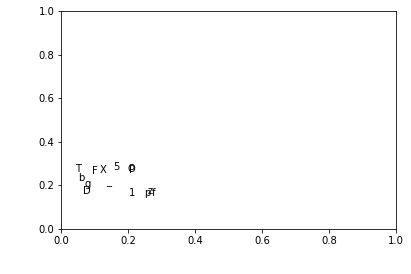

In [15]:
labels = unique_chars[:-1]
xd = [e[0] for e in encodings]
yd = [e[1] for e in encodings]
fig, ax = plt.subplots()
for i, txt in enumerate(labels):
    _ = ax.annotate(txt, (xd[i],yd[i]))


findClosest(labels, encodings, n=2)

plt.show()